# **<center><u> LAB TASK 6 <u></center>** 

## **TUFAIL HAIDER**
## **FA22-BCS-014**

## **Q1. Write the code of the following programs in Python language**

Select search category:
1. Uninformed Search
2. Informed Search
Enter 1 or 2:  2

Select Informed Search Algorithm:
1. Best-First Search
2. A* Search
Enter 1 or 2:  1

Enter start node:  S
Enter goal node:  D



Visited nodes: ['S', 'B', 'C', 'G', 'E', 'A', 'D']
Optimal path: ['S', 'A', 'D']
Total cost: 10


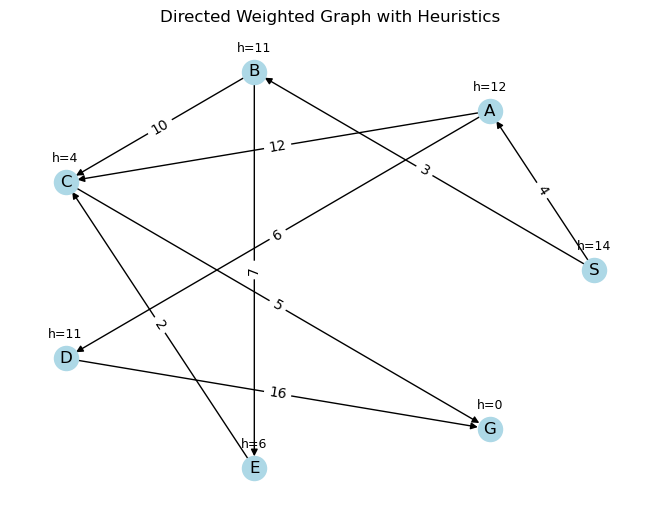

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

graph = {
    'S': [('A', 4), ('B', 3)],
    'A': [('C', 12), ('D', 6)],
    'B': [('C', 10), ('E', 7)],
    'C': [('G', 5)],
    'D': [('G', 16)],
    'E': [('C', 2)],
    'G': [] 
}

heuristics = {
    'S': 14,
    'A': 12,
    'B': 11,
    'C': 4,
    'D': 11,
    'E': 6,
    'G': 0
}

def dfs(start, goal):
    visited = []
    stack = [start]
    parent = {start: None}
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            for neighbor, _ in reversed(graph[node]):
                if neighbor not in visited:
                    parent[neighbor] = node
                    stack.append(neighbor)
    return visited, reconstruct_path(parent, goal)

def bfs(start, goal):
    visited = []
    queue = [start]
    parent = {start: None}
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            for neighbor, _ in graph[node]:
                if neighbor not in visited and neighbor not in queue:
                    parent[neighbor] = node
                    queue.append(neighbor)
    return visited, reconstruct_path(parent, goal)

def best_first(start, goal):
    visited = []
    pq = PriorityQueue()
    pq.put((heuristics[start], start))
    parent = {start: None}
    cost_so_far = {start: 0}  
    
    while not pq.empty():
        _, node = pq.get()
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            break
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                parent[neighbor] = node
                pq.put((heuristics[neighbor], neighbor))
                cost_so_far[neighbor] = cost_so_far[node] + weight

    return visited, reconstruct_path(parent, goal), cost_so_far.get(goal, float('inf'))

def a_star(start, goal):
    visited = []
    pq = PriorityQueue()
    pq.put((0 + heuristics[start], 0, start))
    parent = {start: None}
    cost_so_far = {start: 0}
    
    while not pq.empty():
        _, cost, node = pq.get()
        if node in visited:
            continue
        visited.append(node)
        
        if node == goal:
            final_cost = cost + heuristics[goal]
            return visited, reconstruct_path(parent, goal), final_cost
        
        for neighbor, weight in graph[node]:
            new_cost = cost_so_far[node] + weight
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristics[neighbor]
                pq.put((priority, new_cost, neighbor))
                parent[neighbor] = node
                
    return visited, reconstruct_path(parent, goal), float('inf')

def reconstruct_path(parent, goal):
    path = []
    while goal:
        path.append(goal)
        goal = parent.get(goal)
    return list(reversed(path))

def draw_graph():
    G = nx.DiGraph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.circular_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    for node in G.nodes:
        x, y = pos[node]
        plt.text(x, y + 0.1, f'h={heuristics[node]}', fontsize=9, ha='center')
    plt.title("Directed Weighted Graph with Heuristics")
    plt.show()

def get_valid_input(prompt, valid_choices):
    while True:
        user_input = input(prompt).strip().upper()
        if user_input in valid_choices:
            return user_input
        else:
            print("Invalid input. Please enter a valid option.")

def main():
    category = get_valid_input("Select search category:\n1. Uninformed Search\n2. Informed Search\nEnter 1 or 2: ", ['1', '2'])

    if category == '1':
        algo = get_valid_input("\nSelect Uninformed Search Algorithm:\n1. Breadth-First Search (BFS)\n2. Depth-First Search (DFS)\nEnter 1 or 2: ", ['1', '2'])
    elif category == '2':
        algo = get_valid_input("\nSelect Informed Search Algorithm:\n1. Best-First Search\n2. A* Search\nEnter 1 or 2: ", ['1', '2'])

    start = get_valid_input("\nEnter start node: ", graph.keys())
    goal = get_valid_input("Enter goal node: ", graph.keys())

    if category == '1':
        if algo == '1':
            visited, path = bfs(start, goal)
        elif algo == '2':
            visited, path = dfs(start, goal)
        print(f"\nVisited nodes: {visited}")
        print(f"Path to goal: {path}")

    elif category == '2':
        if algo == '1':
            visited, path, cost = best_first(start, goal)
            print(f"\nVisited nodes: {visited}")
            print(f"Optimal path: {path}")
            print(f"Total cost: {cost}")
        elif algo == '2':
            visited, path, cost = a_star(start, goal)
            print(f"\nVisited nodes: {visited}")
            print(f"Optimal path: {path}")
            print(f"Total cost: {cost}")

    draw_graph()

if __name__ == "__main__":
    main()

